# Graphs

OpenFisca-UK has a number of built-in features to make visualising reform impacts clear and consistent. Charts for reforms can generally be split into two categories: individual-level (analysing impacts on explicitly defined people, families and households) and population-level (analysing changes to statistics over the entire population). OpenFisca-UK has functions for the following specific plots at these levels, as well as general helper functions:

- Individual
  - Budget chart
  - MTR chart
- Population
  - Waterfall chart
  - Distributional chart
    - Quartile
    - Quintile
    - Decile
    - Percentile
    
All functions are available by importing the `graphs` module (e.g. `from openfisca_uk import graphs`).

Additionally, most functions allow the passing in of multiple reforms and their names, to create a graph with a slider to vary between the reforms, using Plotly's animation frame format. The plots returned are Plotly Figures, so their aesthetics are changeable through built-in Plotly functions.
    
## Individual-level charts

### Budget chart

A budget chart is a line chart showing the values of key financial variables as a particular variable changes (by default, employment income).

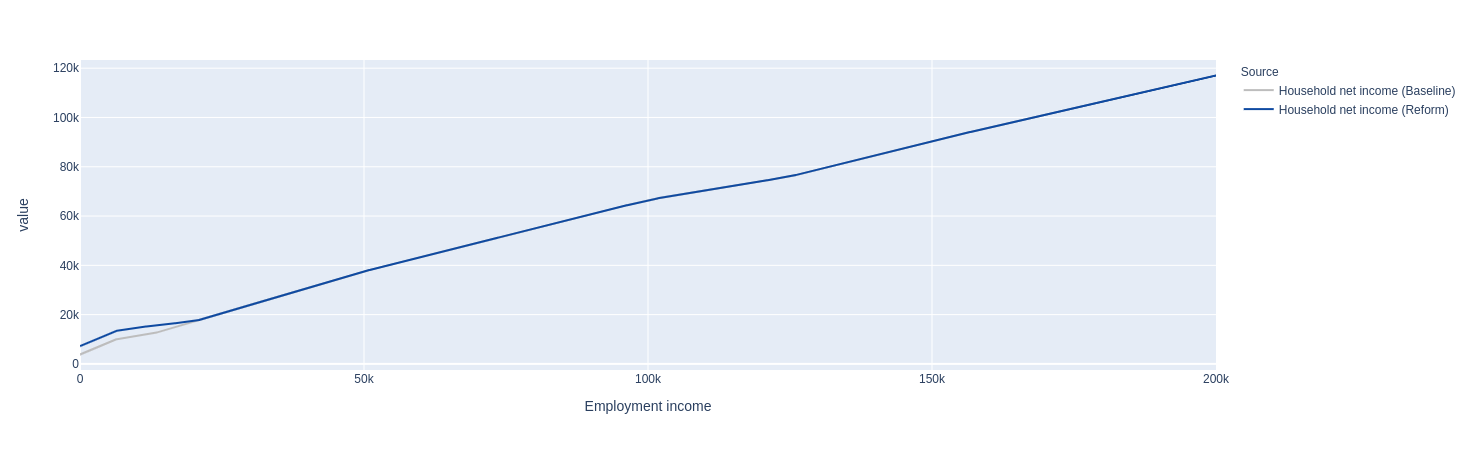

In [4]:
from openfisca_uk import graphs, reforms, BASELINE_PARAMETERS

increase_UC = reforms.parametric.set_parameter(
    BASELINE_PARAMETERS.benefit.universal_credit.standard_allowance.amount.SINGLE_OLD,
    600,
)

graphs.budget_chart(increase_UC, variables=["household_net_income"])

Multiple reforms also work here (from this point on, examples will show multiple reforms).

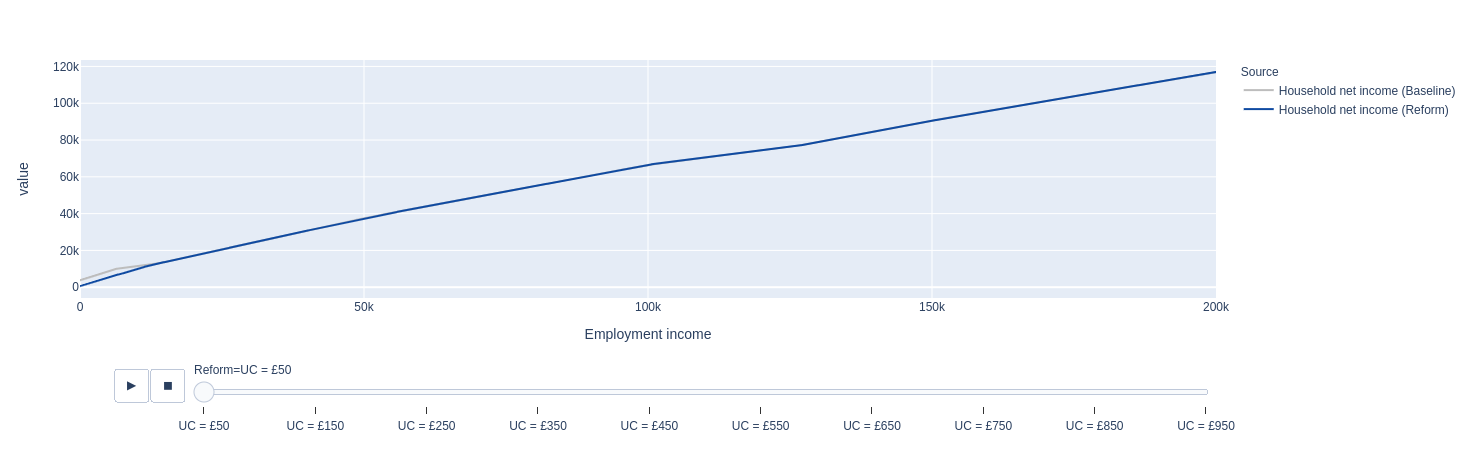

In [5]:
UC_reforms = [
    reforms.parametric.set_parameter(
        BASELINE_PARAMETERS.benefit.universal_credit.standard_allowance.amount.SINGLE_OLD,
        amount,
    )
    for amount in range(50, 1000, 100)
]
reform_names = [f"UC = £{amount}" for amount in range(50, 1000, 100)]

graphs.budget_chart(
    UC_reforms, names=reform_names, variables=["household_net_income"]
)

## MTR chart

MTR charts work in exactly the same way as budget charts.

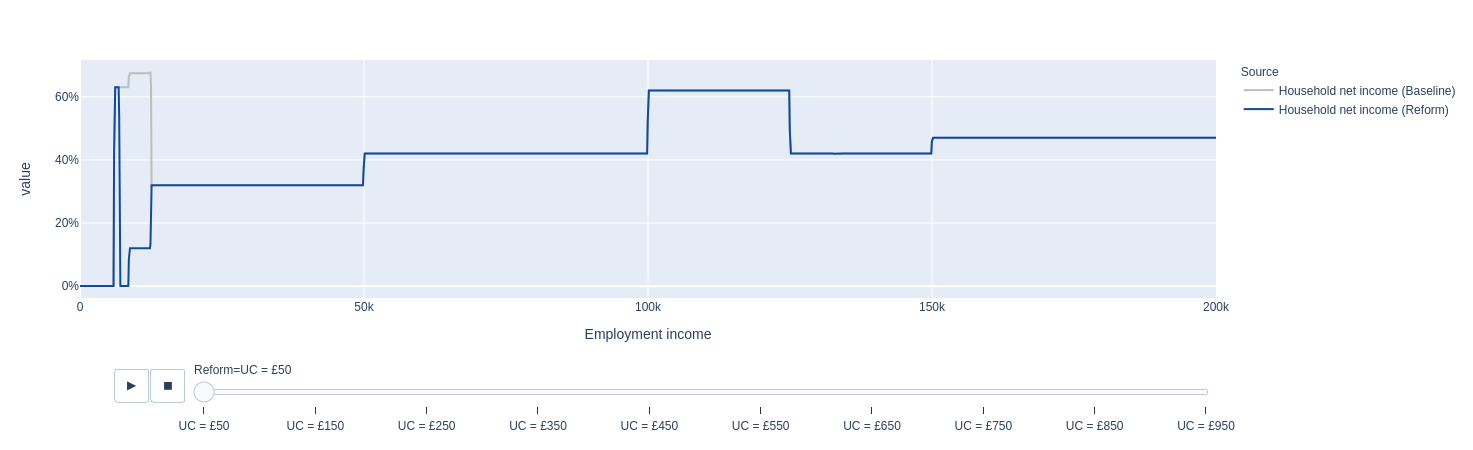

In [6]:
UC_reforms = [
    reforms.parametric.set_parameter(
        BASELINE_PARAMETERS.benefit.universal_credit.standard_allowance.amount.SINGLE_OLD,
        amount,
    )
    for amount in range(50, 1000, 100)
]
reform_names = [f"UC = £{amount}" for amount in range(50, 1000, 100)]

graphs.mtr_chart(
    UC_reforms, names=reform_names, variables=["household_net_income"]
)

## Population-level charts
### Waterfall chart

A waterfall chart shows the cumulative impacts of each top-level component of a reform in terms of overall financial cost.

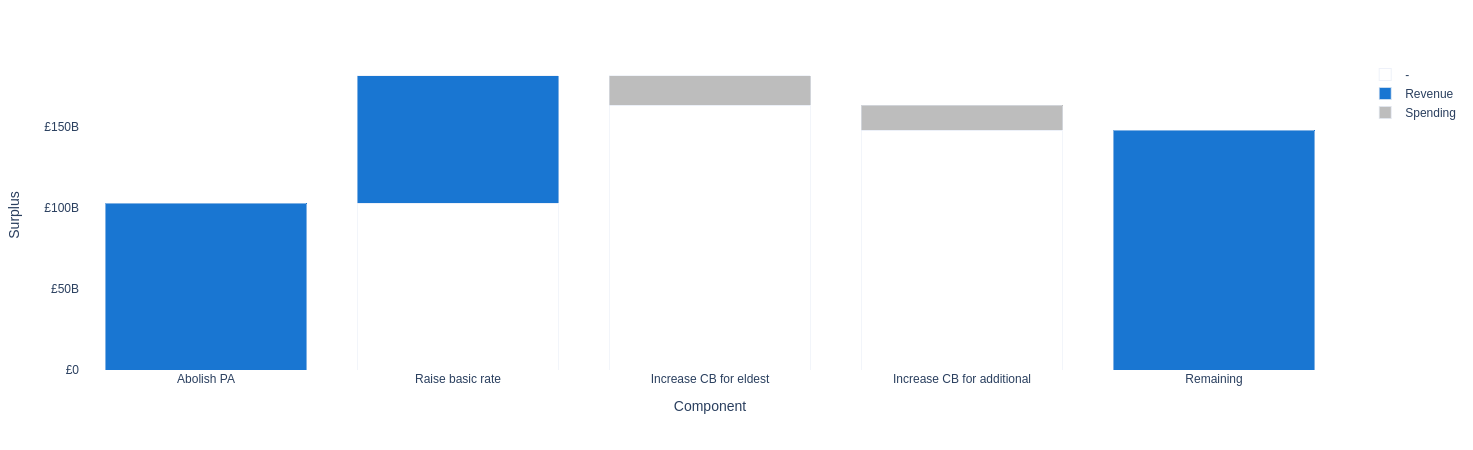

In [7]:
abolish_PA = reforms.structural.abolish("personal_allowance")
raise_basic_rate = reforms.parametric.set_parameter(
    BASELINE_PARAMETERS.tax.income_tax.rates.uk.brackets[0].rate, 0.3
)
increase_CB_eldest = reforms.parametric.set_parameter(
    BASELINE_PARAMETERS.benefit.child_benefit.amount.eldest, 80
)
increase_CB_additional = reforms.parametric.set_parameter(
    BASELINE_PARAMETERS.benefit.child_benefit.amount.additional, 80
)

multi_part_reform = (
    abolish_PA,
    raise_basic_rate,
    increase_CB_eldest,
    increase_CB_additional,
)

graphs.waterfall_chart(
    multi_part_reform,
    subreform_labels=[
        "Abolish PA",
        "Raise basic rate",
        "Increase CB for eldest",
        "Increase CB for additional",
    ],
)

Note that this decomposition only happens at the top level, so we could control the grouping by editing the structure of the reform, for example to consolidate parts of the reform:

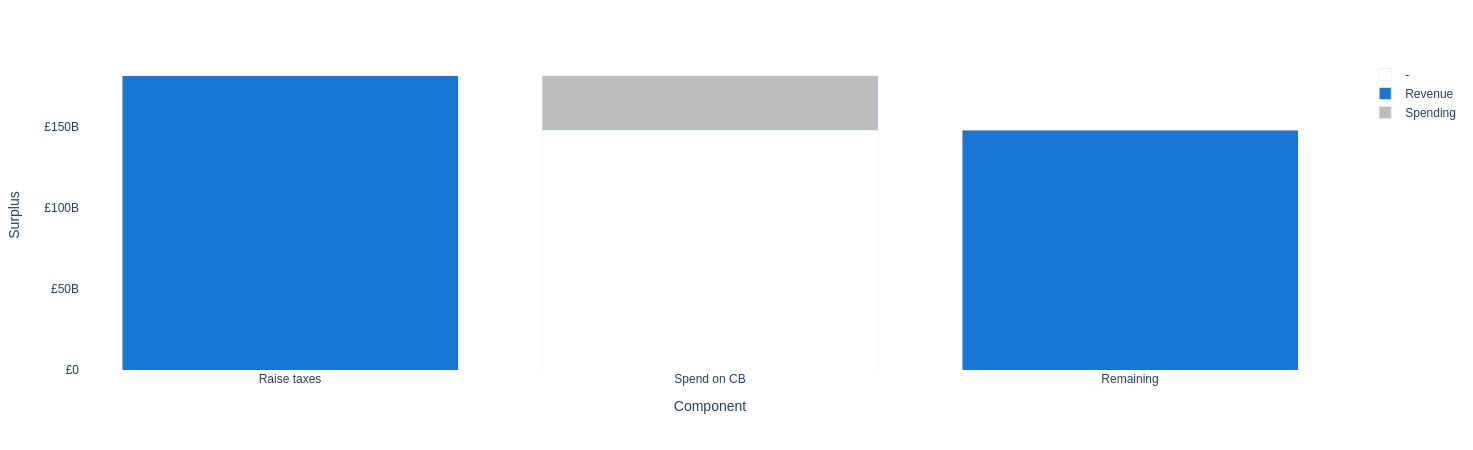

In [8]:
abolish_PA = reforms.structural.abolish("personal_allowance")
raise_basic_rate = reforms.parametric.set_parameter(
    BASELINE_PARAMETERS.tax.income_tax.rates.uk.brackets[0].rate, 0.3
)
increase_CB_eldest = reforms.parametric.set_parameter(
    BASELINE_PARAMETERS.benefit.child_benefit.amount.eldest, 80
)
increase_CB_additional = reforms.parametric.set_parameter(
    BASELINE_PARAMETERS.benefit.child_benefit.amount.additional, 80
)

# Group tax and benefit sides
multi_part_reform = (
    (abolish_PA, raise_basic_rate),
    (increase_CB_eldest, increase_CB_additional),
)

graphs.waterfall_chart(
    multi_part_reform, subreform_labels=["Raise taxes", "Spend on CB"]
)

We can also pass in multiple reforms here, though this does start to become computationally expensive - with $n$ reforms of $m$ components each, that's $nm + 1$ total microsimulation runs on the microdata.

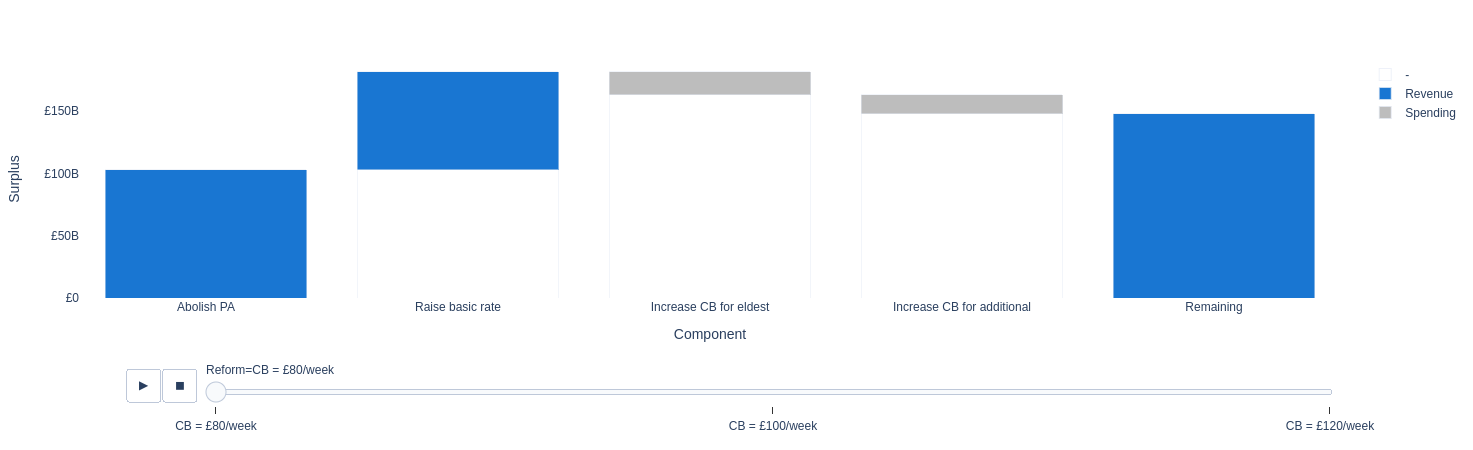

In [9]:
def create_CB_tax_funded_reform(CB_amount):
    abolish_PA = reforms.structural.abolish("personal_allowance")
    raise_basic_rate = reforms.parametric.set_parameter(
        BASELINE_PARAMETERS.tax.income_tax.rates.uk.brackets[0].rate, 0.3
    )
    increase_CB_eldest = reforms.parametric.set_parameter(
        BASELINE_PARAMETERS.benefit.child_benefit.amount.eldest, CB_amount
    )
    increase_CB_additional = reforms.parametric.set_parameter(
        BASELINE_PARAMETERS.benefit.child_benefit.amount.additional, CB_amount
    )
    multi_part_reform = (
        abolish_PA,
        raise_basic_rate,
        increase_CB_eldest,
        increase_CB_additional,
    )
    return multi_part_reform


CB_reforms = [create_CB_tax_funded_reform(amount) for amount in (80, 100, 120)]
reform_names = [f"CB = £{amount}/week" for amount in (80, 100, 120)]
graphs.waterfall_chart(
    CB_reforms,
    reform_labels=reform_names,
    subreform_labels=[
        "Abolish PA",
        "Raise basic rate",
        "Increase CB for eldest",
        "Increase CB for additional",
    ],
)

### Distributional charts

Available for various bucketing sizes, the distributional charts show the impacts on different sections of the population:

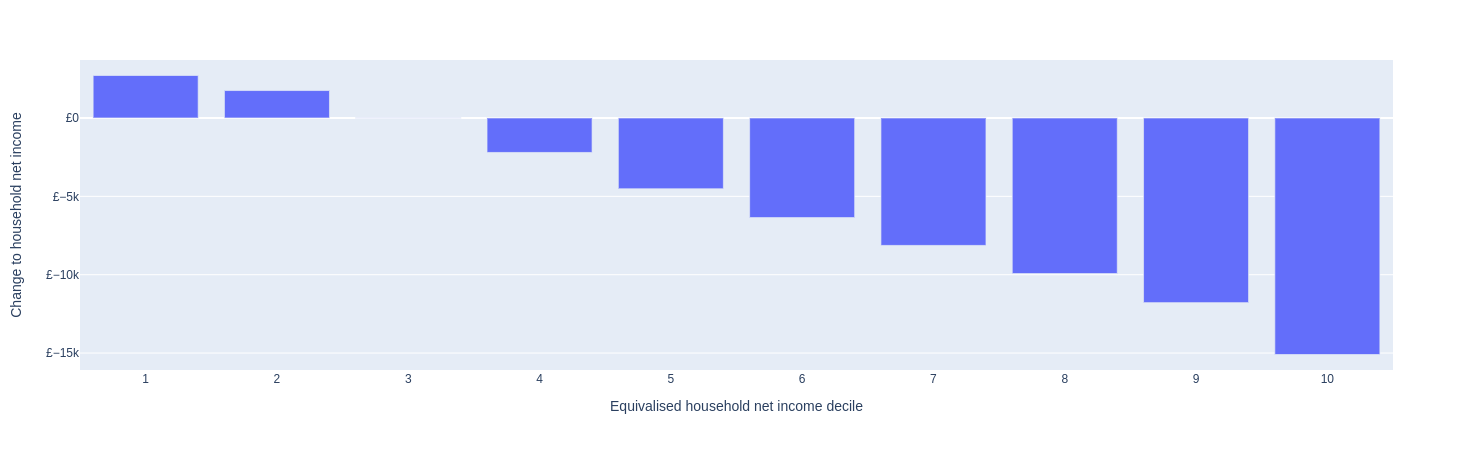

In [10]:
from openfisca_uk.api import *

abolish_PA = reforms.structural.abolish("personal_allowance")
raise_basic_rate = reforms.parametric.set_parameter(
    BASELINE_PARAMETERS.tax.income_tax.rates.uk.brackets[0].rate, 0.3
)
increase_CB_eldest = reforms.parametric.set_parameter(
    BASELINE_PARAMETERS.benefit.child_benefit.amount.eldest, 80
)
increase_CB_additional = reforms.parametric.set_parameter(
    BASELINE_PARAMETERS.benefit.child_benefit.amount.additional, 80
)

# Group tax and benefit sides
multi_part_reform = (
    (abolish_PA, raise_basic_rate),
    (increase_CB_eldest, increase_CB_additional),
)

graphs.decile_chart(
    multi_part_reform, "equiv_household_net_income", "household_net_income"
)

Like other functions, this handles multiple reforms:

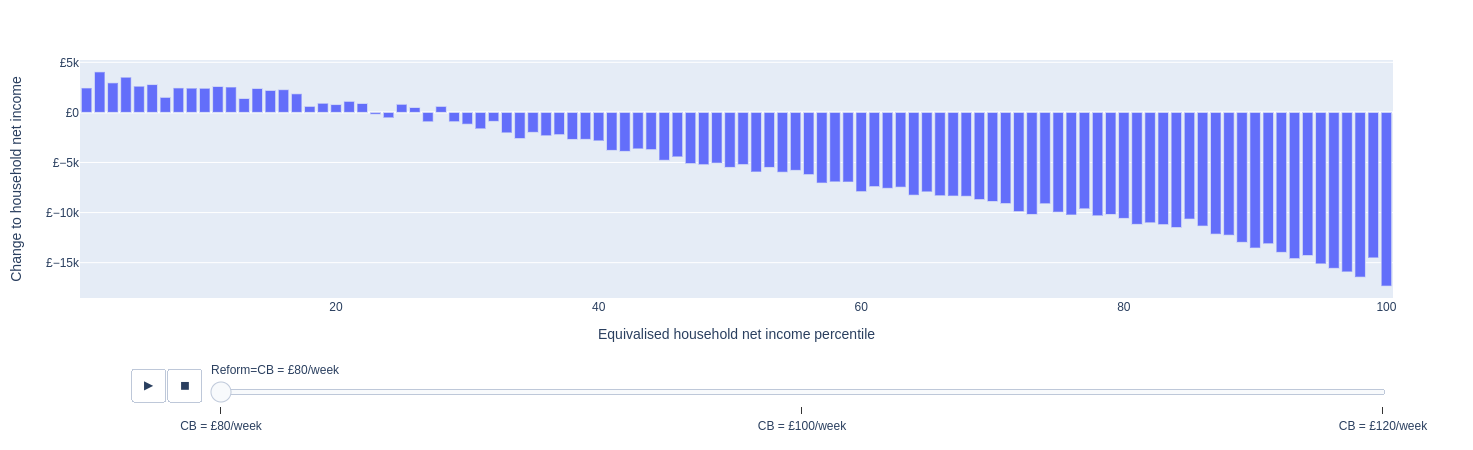

In [11]:
from openfisca_uk.api import *


def create_CB_tax_funded_reform(CB_amount):
    abolish_PA = reforms.structural.abolish("personal_allowance")
    raise_basic_rate = reforms.parametric.set_parameter(
        BASELINE_PARAMETERS.tax.income_tax.rates.uk.brackets[0].rate, 0.3
    )
    increase_CB_eldest = reforms.parametric.set_parameter(
        BASELINE_PARAMETERS.benefit.child_benefit.amount.eldest, CB_amount
    )
    increase_CB_additional = reforms.parametric.set_parameter(
        BASELINE_PARAMETERS.benefit.child_benefit.amount.additional, CB_amount
    )
    multi_part_reform = (
        abolish_PA,
        raise_basic_rate,
        increase_CB_eldest,
        increase_CB_additional,
    )
    return multi_part_reform


CB_reforms = [create_CB_tax_funded_reform(amount) for amount in (80, 100, 120)]
reform_names = [f"CB = £{amount}/week" for amount in (80, 100, 120)]
graphs.percentile_chart(
    CB_reforms,
    reform_names=reform_names,
    bucket_variable="equiv_household_net_income",
    change_variable="household_net_income",
)